# Transfer Function: Design Study A

In [1]:
import sympy
from sympy import *
from sympy.physics.vector.printing import vlatex
from IPython.display import Math, display

init_printing()

def dotprint(expr):
    display(Math(vlatex(expr)))

In [2]:
t = symbols('t', real=True)
theta = symbols(r'\theta', cls=Function)
theta = theta(t)
theta

theta_dot = theta.diff(t)
theta_ddot = theta.diff(t,2)

ell, m, g, P_0, tau, b = symbols(r'\ell, m, g, P_0, \tau, b', real=True)

state = MatrixSymbol('x',2,1)

In [3]:
LHS = Rational(1,3)*m*ell**2*theta_ddot + Rational(1,2)*m*g*ell*cos(theta)
RHS = tau - b*theta_dot

dynamics = Eq(LHS, RHS)
dotprint(dynamics)

<IPython.core.display.Math object>

In [4]:
A = Matrix([
    [0, 1],
    [Rational(3,2)*g*sin(state[0])/ell, -3*b/(ell**2*m)]
])
A

⎡     0           1   ⎤
⎢                     ⎥
⎢3⋅g⋅sin(x₀₀)   -3⋅b  ⎥
⎢────────────  ───────⎥
⎢   2⋅\ell         2  ⎥
⎣              \ell ⋅m⎦

In [5]:
B = Matrix([
    [0],
    [3/(ell**2*m)]
])
B

⎡   0   ⎤
⎢       ⎥
⎢   3   ⎥
⎢───────⎥
⎢    2  ⎥
⎣\ell ⋅m⎦

For Design Study A, our output is typically $x_0 = \theta$. This means that 

$$
y = h(x,u) = [1,0] x = Cx
$$

where $C = [1,0]$.

(Our typical linear output equation is $y = Cx+Du$, but here we have $D=0$.)

In [6]:
C = Matrix([[1,0]])
D = Matrix([[0]])

## Deriving Transfer Function from State Space Equations

First, we create a variable corresponding to $s$ in the Laplace domain.

In [7]:
#i = symbols('i')
s = symbols('s')

Next, we use the following equation to derive a transfer function representation from our state space equations:

$$
H(s) = C(sI-A)^{-1}B+D
$$

The polynomial $H(s)$ is the transfer function in the frequency domain.

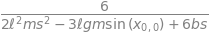

In [8]:
I = eye(2)

H = (C @ (s*I - A).inv() @ B)[0]
H